         Date  Consumption  Wind  Solar  Wind+Solar
0  2006-01-01     1069.184   NaN    NaN         NaN
1  2006-01-02     1380.521   NaN    NaN         NaN
2  2006-01-03     1442.533   NaN    NaN         NaN
3  2006-01-04     1457.217   NaN    NaN         NaN
4  2006-01-05     1477.131   NaN    NaN         NaN


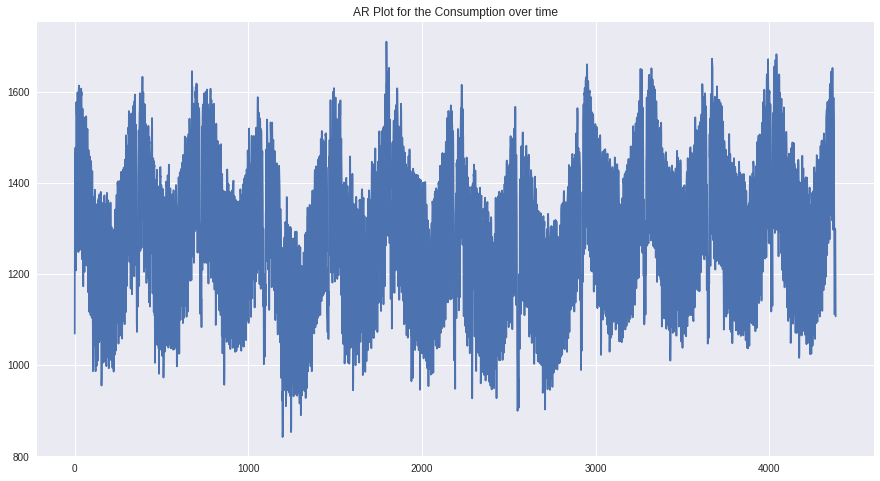

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

df = pd.read_csv("https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv",
                 sep=",")
print(df.head())

plt.style.use('seaborn')
plt.figure(figsize=(15,8))
df['Consumption'].plot()
plt.title("AR Plot for the Consumption over time")
plt.show()

The value of Stationary is :  4.7440549018425884e-08
Stationary exists in the Dataset!



/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


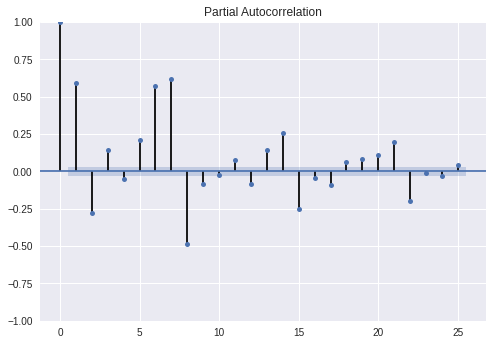

In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf


df_stationarityTest = adfuller(df['Consumption'], autolag='AIC')
sta_val = df_stationarityTest[1]
print("The value of Stationary is : ", sta_val)
if(sta_val<0.05):
  print("Stationary exists in the Dataset!")
else:
  print("Stationary doesn't exist in the Dataset!")

print()
pacf = plot_pacf(df['Consumption'], lags=25)

In [ ]:
train_data = df['Consumption'][:len(df)-100]
test_data = df['Consumption'][len(df)-100:]
ar_model = AutoReg(train_data, lags=8).fit()
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:            Consumption   No. Observations:                 4283
Model:                     AutoReg(8)   Log Likelihood              -24231.812
Method:               Conditional MLE   S.D. of innovations             70.058
Date:                Sat, 18 Jun 2022   AIC                          48483.625
Time:                        10:39:33   BIC                          48547.230
Sample:                             8   HQIC                         48506.095
                                 4283                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            121.2792     14.444      8.397      0.000      92.969     149.589
Consumption.L1     0.6393      0.013     47.751      0.000       0.613       0.666
Consumption.L2    -0.0966      0.011

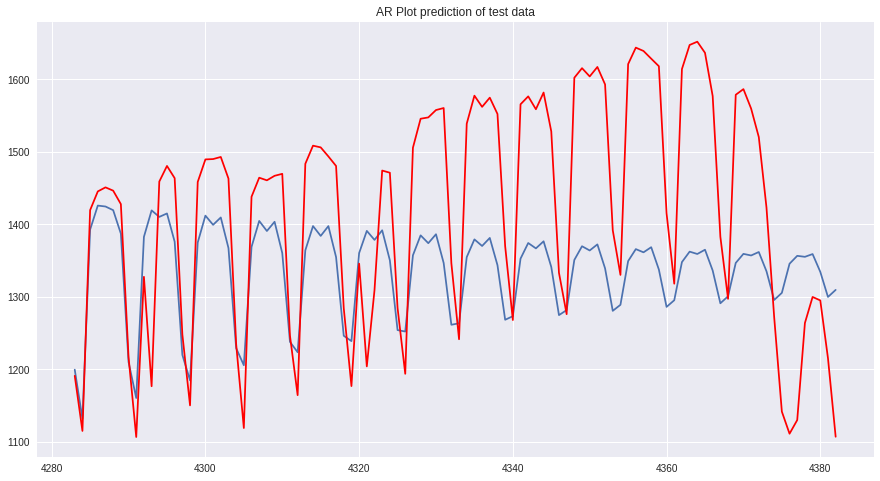

In [ ]:
pred = ar_model.predict(start=len(train_data), end=(len(df)-1), dynamic=False)

from matplotlib import pyplot
plt.figure(figsize=(15,8))
pyplot.plot(pred)
pyplot.plot(test_data, color='red')
plt.title("AR Plot prediction of test data")
plt.show()